In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import chainer
project_path = os.getcwd() + '/../../'
sys.path.append(project_path + "utils")

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.externals import joblib
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

/Users/admin/Desktop/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
import function
import preprocessing_past
import local_bayes
import visualize

In [7]:
import other

In [8]:
sys.path.append(project_path + "multi_models/cnn/")
sys.path.append(project_path + "models/cnn/")

In [9]:
p = preprocessing_past.Preprocessing(data_dir = "../../original_data/bookmark/")

# make

In [18]:
## 注意: このデータロードはdataを入力とする場合, 関数ごとに毎回必要
# movielens = p.load_data('movielens.twd')
# science = p.load_data('science.twd')
# ajax = p.load_data('ajax.twd')
# java = p.load_data('java.twd')
# news = p.load_data('news.twd')
# css = p.load_data('css.twd')
# javascript = p.load_data('javascript.twd')
# opensource = p.load_data('opensource.twd')
# webdesign = p.load_data('webdesign.twd')
# design = p.load_data('design.twd')
# linux = p.load_data('linux.twd')
# photography = p.load_data('photography.twd')

# data_ls = [science, ajax, java, news, css, javascript, opensource, webdesign, design, linux, photography]
data_name_ls = ['science', 'ajax', 'java', 'news', 'css', 'javascript', 'opensource', 'webdesign', 'design', 'linux', 'photography']

In [19]:
for data_name in data_name_ls:
    print data_name
    data = p.load_data('%s.twd' % data_name)
    category_ts, category_sum = p.timeseries(data)
    category_started_ts = p.make_started_ts(category_ts)
    category_input_ts, category_label, category_input_sum = p.make_supervised_data(category_started_ts, stride=5)
    x, label = p.balancing_sampling(category_input_ts, category_label)
    save_data_dir = '../../data/bookmark/%s/all_30/' % data_name
    os.mkdir(save_data_dir)
    p.make_test_dataset(x, label, save_data_dir)

science
ajax
java
news
css
javascript
opensource
webdesign
design
linux
photography


# load

In [46]:
save_data_dir = '../../data/bookmark/'
train_ajax = numpy.load(save_data_dir + 'ajax' + '/balanced/output_dim=6/train.npz')
test_ajax = numpy.load(save_data_dir + 'ajax' + '/balanced/output_dim=6/test.npz')
target_ajax = numpy.load(save_data_dir + 'ajax' + '/balanced/output_dim=6/target.npz')

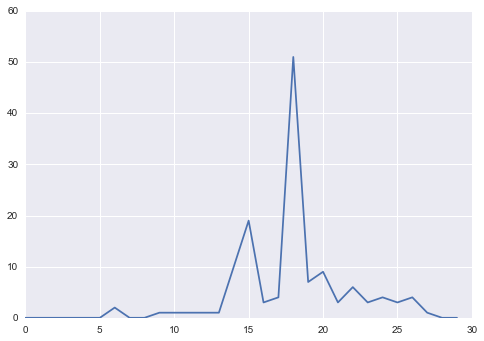

In [56]:
plt.plot(train_ajax['x'][4])

In [68]:
train_ajax['y'][:10]

array([[ 1.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

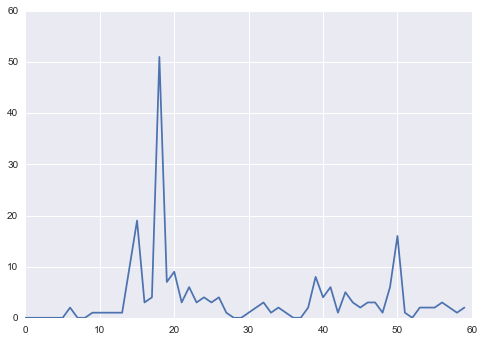

In [58]:
plt.plot(target_ajax['train'][4])

In [14]:
train_ajax['y'][1]

array([ 0.,  0.,  1.,  0.,  0.,  0.])

# model training

In [20]:
import cnn

In [11]:
# epoch_num = 50
# output_dim = 2
# save_data_dir = '../../data/bookmark/ajax/balanced/'
# save_model_dir = "../../results/balanced_multi/output_dim=%s/ajax_%s/" % (output_dim, epoch_num)
# other.mkdir_p(save_model_dir)
# train = numpy.load(save_data_dir + 'output_dim=%s/train.npz' % output_dim)
# test = numpy.load(save_data_dir + 'output_dim=%s/test.npz' % output_dim)
# cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [17]:
train['y'].squeeze()

array([ 0.,  1.,  1., ...,  0.,  0.,  1.])

In [22]:
epoch_num = 300
for output_dim in [1]:
    save_data_dir = '../../data/bookmark/ajax/all/0_test/0_fold/'
    save_model_dir = "../../results/all/output_dim=%s/ajax_%s/" % (output_dim, epoch_num)
    other.mkdir_p(save_model_dir)
    train = numpy.load(save_data_dir + '0_train.npz')
    test = numpy.load(save_data_dir + '0_test.npz')
    cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)
    cnntrain.train(train, test)

epoch 1
graph generated
train mean loss=0.844704754133, accuracy=0.682855046154, throughput=985.748350198 images/sec
test  mean loss=0.550449800827, accuracy=0.725399500187
epoch 2
train mean loss=0.571844634427, accuracy=0.719962161083, throughput=1061.90741429 images/sec
test  mean loss=0.592117101957, accuracy=0.72497897498
epoch 3
train mean loss=0.530118470868, accuracy=0.738358035206, throughput=1032.05613148 images/sec
test  mean loss=0.528832759022, accuracy=0.73044575148
epoch 4
train mean loss=0.515601786804, accuracy=0.746872701975, throughput=990.979816583 images/sec
test  mean loss=0.526498163518, accuracy=0.736333052184
epoch 5
train mean loss=0.531700896475, accuracy=0.738358036647, throughput=967.452494684 images/sec
test  mean loss=0.53846914887, accuracy=0.73633305093
epoch 6
train mean loss=0.49414950019, accuracy=0.757805109137, throughput=956.41893313 images/sec
test  mean loss=0.494411491816, accuracy=0.756938600811
epoch 7
train mean loss=0.483951843175, accuracy

In [67]:
test["y"].astype(numpy.int32)[:10]

array([[0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

In [62]:
import chainer.functions

In [63]:
t_ = chainer.functions.array.split_axis.split_axis(chainer.Variable(test["y"].astype(numpy.int32)), 2, 1)

In [64]:
chainer.Variable(t_[0].data.squeeze()).data

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [65]:
cnntrain.train(train, test, output_dim)

epoch 1
graph generated
train mean loss=0.521749988219, accuracy=[ 0.79888803  0.82337219], throughput=1005.20311902 images/sec
test  mean loss=0.43464985208, accuracy=[ 0.79669029  0.81678486]
epoch 2
train mean loss=0.422643821551, accuracy=[ 0.79888803  0.82337219], throughput=1054.85230354 images/sec
test  mean loss=0.422111227134, accuracy=[ 0.79669029  0.81678486]
epoch 3
train mean loss=0.408932572958, accuracy=[ 0.79888803  0.82337219], throughput=1113.08690132 images/sec
test  mean loss=0.409008013465, accuracy=[ 0.79669029  0.81678486]
epoch 4
train mean loss=0.405950754785, accuracy=[ 0.79888803  0.82337219], throughput=1058.31431915 images/sec
test  mean loss=0.405927830718, accuracy=[ 0.79669029  0.81678486]
epoch 5
train mean loss=0.399369446514, accuracy=[ 0.79888803  0.82337219], throughput=1064.73916284 images/sec
test  mean loss=0.415084924751, accuracy=[ 0.79669029  0.81678486]
epoch 6
train mean loss=0.395039249054, accuracy=[ 0.79888803  0.82337219], throughput=997

KeyboardInterrupt: 

In [28]:
epoch_num = 50
save_data_dir = '../data/bookmark/ajax_30/'
save_model_dir = "../models/cnn/results/ajax_%s_30/" % epoch_num
os.mkdir("../models/cnn/results/ajax_%s_30" % epoch_num)
train_0_0_30 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0_30 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

OSError: [Errno 2] No such file or directory: '../models/cnn/results/ajax_50_30'

In [57]:
train_0_0_30['x'].shape

(2168, 30)

In [58]:
cnntrain.train(train_0_0_30, test_0_0_30)

epoch 1
graph generated
train mean loss=0.856766545025, accuracy=0.749077491297, throughput=915.436561686 images/sec
test  mean loss=0.770515868255, accuracy=0.769372691967
epoch 2
train mean loss=0.513243945982, accuracy=0.783671582042, throughput=951.976112163 images/sec
test  mean loss=0.517006267701, accuracy=0.7822878176
epoch 3
train mean loss=0.412609556917, accuracy=0.818265679633, throughput=1027.25791076 images/sec
test  mean loss=0.451953402415, accuracy=0.789667895359
epoch 4
train mean loss=0.374739015839, accuracy=0.839022137032, throughput=1065.5489713 images/sec
test  mean loss=0.436411118925, accuracy=0.813653138291
epoch 5
train mean loss=0.350621334466, accuracy=0.845479698474, throughput=1073.68401146 images/sec
test  mean loss=0.52345504488, accuracy=0.789667890521
epoch 6
train mean loss=0.344226040468, accuracy=0.855166042038, throughput=1046.9965709 images/sec
test  mean loss=0.429894789449, accuracy=0.800738004301
epoch 7
train mean loss=0.33875343829, accuracy

In [59]:
epoch_num = 50
save_data_dir = '../data/bookmark/ajax_60/'
save_model_dir = "../models/cnn/results/ajax_%s_60/" % epoch_num
os.mkdir("../models/cnn/results/ajax_%s_60" % epoch_num)
train_0_0_60 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0_60 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [60]:
train_0_0_60['x'].shape

(1456, 30)

In [61]:
cnntrain.train(train_0_0_60, test_0_0_60)

epoch 1
graph generated
train mean loss=0.756237555234, accuracy=0.770604389505, throughput=414.482740029 images/sec
test  mean loss=0.714041425916, accuracy=0.834710748728
epoch 2
train mean loss=0.495513381518, accuracy=0.840659337139, throughput=712.392200358 images/sec
test  mean loss=0.427742324174, accuracy=0.867768587324
epoch 3
train mean loss=0.323671543909, accuracy=0.870879124563, throughput=818.748929825 images/sec
test  mean loss=0.292671098484, accuracy=0.895316805721
epoch 4
train mean loss=0.295001422024, accuracy=0.886675816889, throughput=917.035975479 images/sec
test  mean loss=0.380116275981, accuracy=0.887052334373
epoch 5
train mean loss=0.34921425846, accuracy=0.860576918901, throughput=952.15286567 images/sec
test  mean loss=0.473161475687, accuracy=0.878787879445
epoch 6
train mean loss=0.262986373893, accuracy=0.901098895122, throughput=911.876287539 images/sec
test  mean loss=0.245746021572, accuracy=0.925619831755
epoch 7
train mean loss=0.208810764692, accu